<a href="https://colab.research.google.com/github/varshini110/pneumonia_detection/blob/main/chstn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/chstd'
print(os.listdir(data_dir))
subfolder = os.path.join(data_dir, 'chest_xray/chest_xray')
DIR = os.listdir(subfolder)
print(DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['chest_xray']
['.DS_Store', 'val', 'test', 'train']


In [ ]:
train_folder = '/content/drive/My Drive/chstd/chest_xray/chest_xray/train'
test_folder = '/content/drive/My Drive/chstd/chest_xray/chest_xray/test'
val_folder = '/content/drive/My Drive/chstd/chest_xray/chest_xray/val'

# List the contents of each folder
print("Contents of the train folder:")
print(os.listdir(train_folder))

print("\nContents of the test folder:")
print(os.listdir(test_folder))

print("\nContents of the validation folder:")
print(os.listdir(val_folder))

Contents of the train folder:
['.DS_Store', 'NORMAL', 'PNEUMONIA']

Contents of the test folder:
['.DS_Store', 'PNEUMONIA', 'NORMAL']

Contents of the validation folder:
['.DS_Store', 'PNEUMONIA', 'NORMAL']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

In [ ]:
labels = ["NORMAL", "PNEUMONIA"]
IMG_SIZE = 256

def get_data_train(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    X = np.array([item[0] for item in data])
    y = np.array([item[1] for item in data])
    return list(zip(X, y))

In [ ]:
train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)

OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<Axes: xlabel='count'>

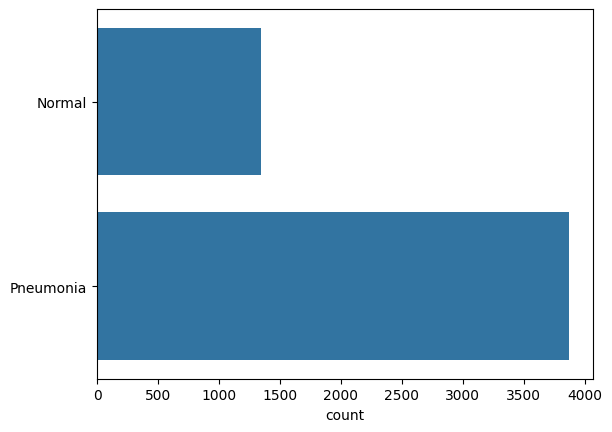

In [ ]:
l = []
for i in range(len(train)):
    if train[i][1] == 0:
        l.append("Normal")
    else:
        l.append("Pneumonia")

sns.countplot(l)

In [ ]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)

for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

In [ ]:
X_train = np.array(X_train) / 255.0
X_val = np.array(X_val) / 255.0
X_test = np.array(X_test) / 255.0

In [ ]:
X_test.shape

(624, 256, 256)

In [ ]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
X_train.shape

(5216, 256, 256, 1)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), shuffle=True, callbacks=[callback])
scores = model.evaluate(X_test, y_test)

model.save("cnn_model.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.7506 - loss: 0.5371 - val_accuracy: 0.7500 - val_loss: 0.6323
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9003 - loss: 0.2833 - val_accuracy: 0.7500 - val_loss: 0.5612
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9224 - loss: 0.1941 - val_accuracy: 0.7500 - val_loss: 0.5446
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.9274 - loss: 0.1873 - val_accuracy: 0.8125 - val_loss: 0.4886
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.9430 - loss: 0.1455 - val_accuracy: 0.6875 - val_loss: 0.5343
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9347 - loss: 0.1593 - val_accuracy: 0.8125 - val_loss: 0.4656
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9448 - loss: 0.1353 - val_accuracy: 0.8750 - val_loss: 0.4236
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.9421 - loss: 0.1467 - 

In [ ]:
print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))

Test loss 0.44199952483177185
Test accuracy 0.8221153616905212


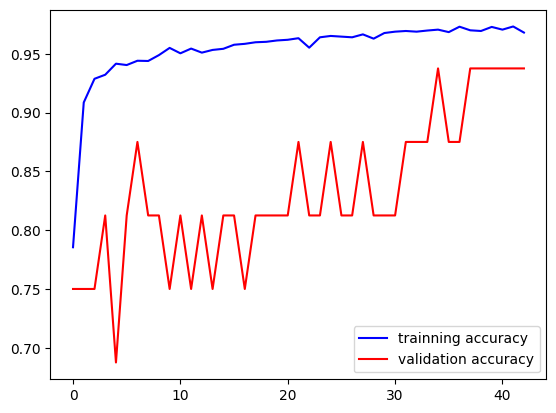

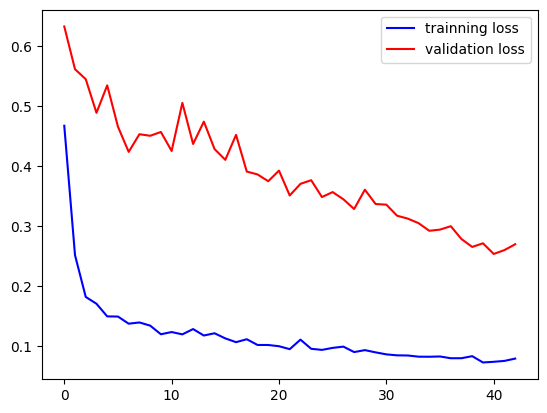

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:
#convert the probabilities to class labels
prediction_probabilities = model.predict(X_test)
prediction = (prediction_probabilities > 0.5).astype(int)  # Assuming binary classification
prediction = prediction.reshape(1, -1)[0]
prediction[:15]

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
correct = np.nonzero(prediction == y_test)[0]
incorrect = np.nonzero(prediction != y_test)[0]

<ipython-input-55-5742bc91b9c4>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,j+1)


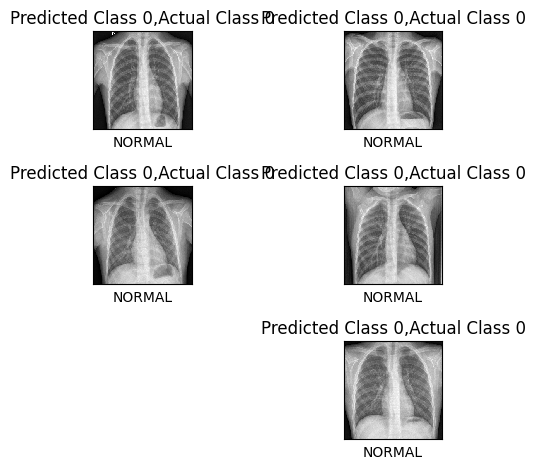

In [ ]:
j = 0
for i in correct[:6]:
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(256,256), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

<ipython-input-56-25d0b58a0cbc>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,j+1)


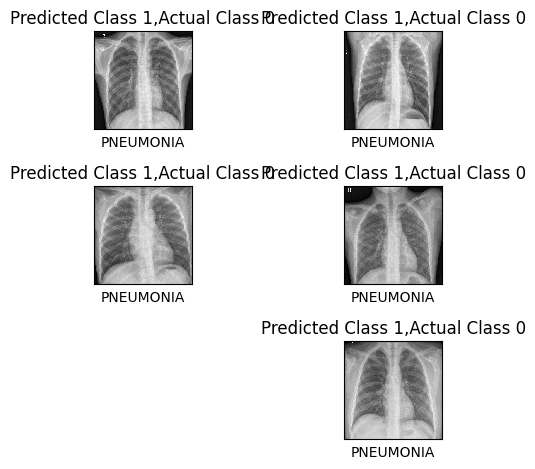

In [ ]:
j = 0
for i in incorrect[:6]:
    plt.subplot(3,2,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(256,256), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(prediction[i], y_test[i]))
    plt.xlabel(labels[prediction[i]])
    plt.tight_layout()
    j += 1

In [ ]:
labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("cnn_model.keras")

In [ ]:

image_path = '/content/drive/My Drive/inp1.jpg'

# Predict the class of the image
prediction = model.predict([prepare(image_path)])


labels = ['Normal', 'Pneumonia']

print(labels[int(prediction[0][0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Pneumonia
